## APOBEX EXPERIMENT 3 PLOTTING

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plot_utils as pu

#### READ IN DATA

In [2]:
df = pd.read_csv('../../data/mutation_tables/all_refitting.csv')
df

,Unnamed: 0,S110,S123,S68,S57,S22,S104,S98,S46,S140,...,S9,S116,S43,S4,S126,S105,S20,S34,S141,S60
0,SBS1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,SBS2,0.000000,0.000000,0.000000,45.720626,37.989883,0.000000,0.000000,0.000000,0.000000,...,276.615441,0.000000,23.196343,0.000000,0.000000,0.000000,0.000000,76.444808,0.000000,14.481396
2,SBS5,319.596433,292.908025,416.305568,175.341235,0.000000,409.833098,310.620557,220.836530,373.273387,...,775.882194,349.970428,613.487763,436.980439,466.807521,490.181472,619.836259,168.741822,478.177595,215.789921
3,SBS6,125.207894,80.376744,0.000000,0.000000,0.000000,149.029569,333.776266,89.390973,59.834536,...,0.000000,0.000000,0.000000,105.849796,172.220485,96.061617,85.623362,0.000000,145.506266,0.000000
4,SBS13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,238.367806,0.000000,70.315907,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,SBS15,257.734280,204.126220,143.313842,134.347554,90.280837,189.328583,0.000000,140.300029,210.259429,...,0.000000,0.000000,75.872217,126.603135,83.900582,240.835522,148.558530,0.000000,256.123181,0.000000
6,SBS18,0.000000,0.000000,0.000000,0.000000,995.216769,0.000000,0.000000,0.000000,0.000000,...,182.368507,0.000000,0.000000,46.423764,0.000000,0.000000,0.000000,134.769408,0.000000,29.094396


In [3]:
df = df.T
df = df.rename(columns={0: 'SBS1', 1: 'SBS2', 2: 'SBS5', 3: 'SBS6', 4: 'SBS13', 5: 'SBS15', 6: 'SBS18'})
df = df.iloc[1:]
df

conditions = ['control', 'HUWE1', 'UBR4', 'UBR5']
conditions_repeated = []
for condition in conditions:
    conditions_repeated.extend([condition] * 18)
df['condition'] = conditions_repeated
df

,SBS1,SBS2,SBS5,SBS6,SBS13,SBS15,SBS18,condition
S110,0.0,0.0,319.596433,125.207894,0.0,257.73428,0.0,control
S123,0.0,0.0,292.908025,80.376744,0.0,204.12622,0.0,control
S68,0.0,0.0,416.305568,0.0,0.0,143.313842,0.0,control
S57,0.0,45.720626,175.341235,0.0,0.0,134.347554,0.0,control
S22,0.0,37.989883,0.0,0.0,0.0,90.280837,995.216769,control
...,...,...,...,...,...,...,...,...
S105,0.0,0.0,490.181472,96.061617,0.0,240.835522,0.0,UBR5
S20,0.0,0.0,619.836259,85.623362,0.0,148.55853,0.0,UBR5
S34,0.0,76.444808,168.741822,0.0,0.0,0.0,134.769408,UBR5
S141,0.0,0.0,478.177595,145.506266,0.0,256.123181,0.0,UBR5


In [4]:
sub1 = pu.normalize_refitting(df, condition='control')
sub2 = pu.normalize_refitting(df, condition='UBR4')
sub3 = pu.normalize_refitting(df, condition='UBR5')
sub4 = pu.normalize_refitting(df, condition='HUWE1')

dfs1 = [sub1, sub2, sub3, sub4]

In [5]:
def pull_raw_refitting(df, condition: str):
    df_sub = df[df['condition'] == condition]
    df_sub = df_sub.iloc[:,0:7]

    # add and rename index
    df_sub = df_sub.reset_index()
    df_sub = df_sub.rename(columns={'index' : 'sample'})

    #change order of columns
    df_sub = df_sub[['sample', 'SBS1', 'SBS5', 'SBS6', 'SBS15', 'SBS18', 'SBS13', 'SBS2']]
    
    return df_sub

In [6]:
#pull out data for each condition not normalized
raw_sub1 = pull_raw_refitting(df, condition='control')
raw_sub2 = pull_raw_refitting(df, condition='UBR4')
raw_sub3 = pull_raw_refitting(df, condition='UBR5')
raw_sub4 = pull_raw_refitting(df, condition='HUWE1')

dfs2 = [raw_sub1, raw_sub2, raw_sub3, raw_sub4]

<Figure size 640x480 with 0 Axes>

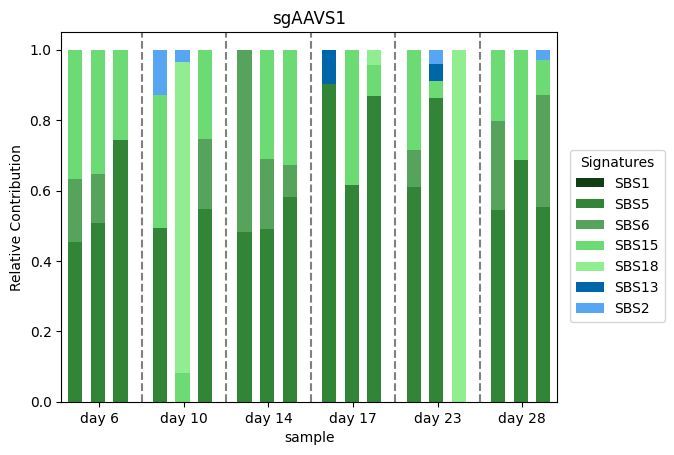

<Figure size 640x480 with 0 Axes>

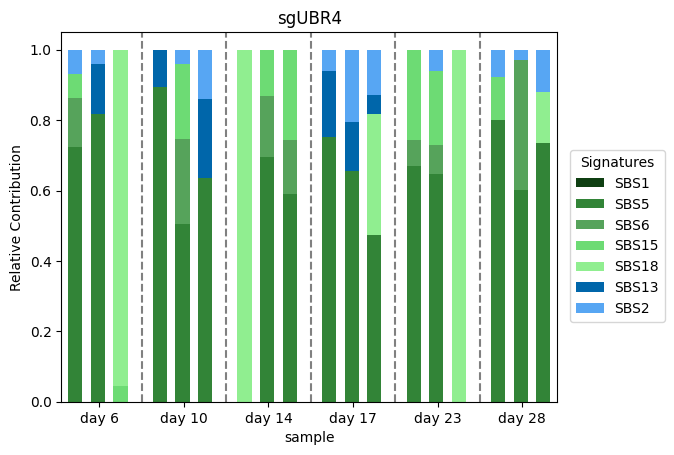

<Figure size 640x480 with 0 Axes>

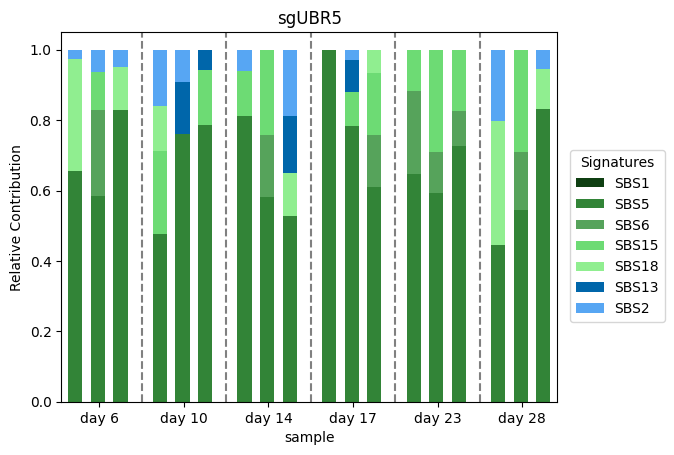

<Figure size 640x480 with 0 Axes>

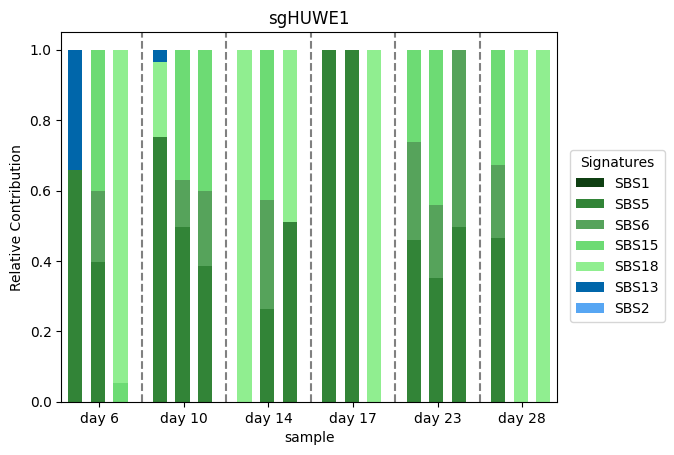

In [7]:
titles = ['sgAAVS1', 'sgUBR4', 'sgUBR5',  'sgHUWE1']
# Plot each data frame in the grid
for df, title in zip(dfs1, titles):
    plt.figure()
    pu.plot_grouped_replicates(df, title, y_label= 'Relative Contribution')
    plt.savefig(f'../plots/{title}_refitting_relative.pdf', format='pdf')
    plt.show()

<Figure size 640x480 with 0 Axes>

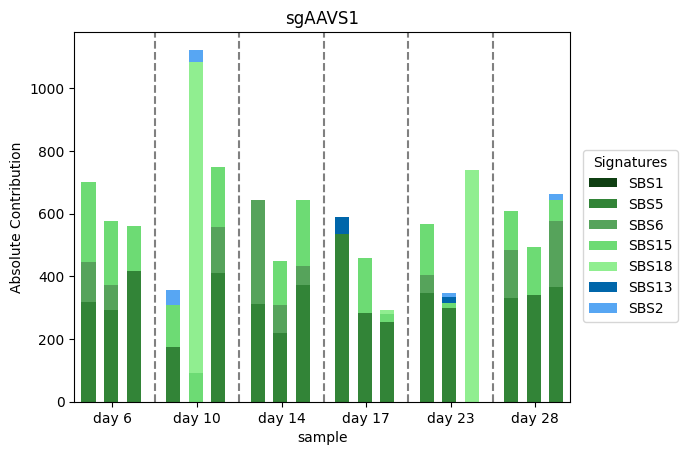

<Figure size 640x480 with 0 Axes>

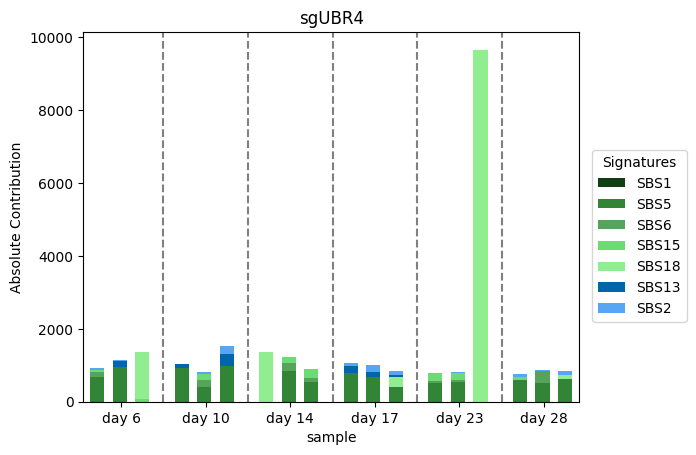

<Figure size 640x480 with 0 Axes>

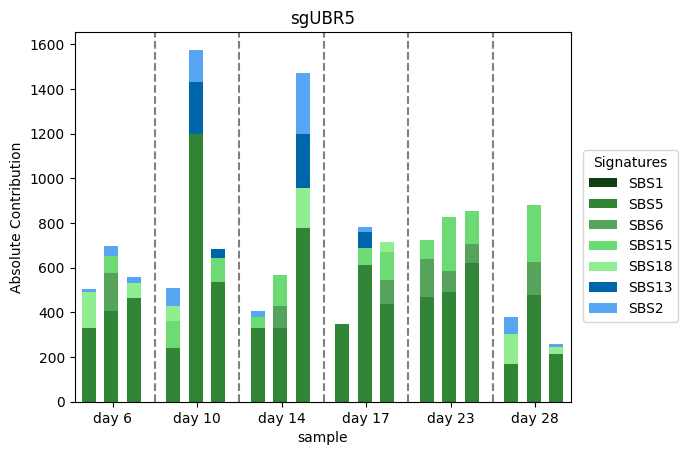

<Figure size 640x480 with 0 Axes>

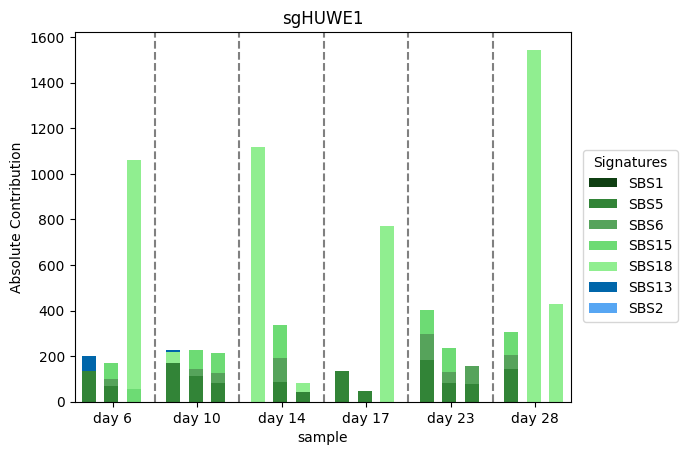

In [8]:
titles = ['sgAAVS1', 'sgUBR4', 'sgUBR5', 'sgHUWE1']
# Plot each data frame in the grid
for df, title in zip(dfs2, titles):
    plt.figure()
    pu.plot_grouped_replicates(df, title, y_label= 'Absolute Contribution')
    plt.savefig(f'../plots/{title}_refitting_absolute.pdf', format='pdf')
    plt.show()

In [9]:
control = raw_sub1.iloc[0:3,:]
huwe = raw_sub4.iloc[3:6,:]
ubr4 = raw_sub2.iloc[3:6,:]
ubr5 = raw_sub3.iloc[3:6,:]

day10_raw_df = pd.concat([control, ubr4, ubr5, huwe], axis=0)

In [10]:
day10_raw_df

,sample,SBS1,SBS5,SBS6,SBS15,SBS18,SBS13,SBS2
0,S110,0.0,319.596433,125.207894,257.73428,0.0,0.0,0.0
1,S123,0.0,292.908025,80.376744,204.12622,0.0,0.0,0.0
2,S68,0.0,416.305568,0.0,143.313842,0.0,0.0,0.0
3,S52,0.0,928.462561,0.0,0.0,0.0,109.400382,0.0
4,S62,0.0,406.894162,192.544967,171.787983,0.0,0.0,32.963509
5,S37,0.0,976.919818,0.0,0.0,0.0,343.196787,214.091215
3,S64,0.0,242.422484,0.0,118.922731,65.261766,0.0,80.876016
4,S56,0.0,1200.348084,0.0,0.0,0.0,232.060575,142.938426
5,S41,0.0,536.790295,0.0,107.140454,0.0,40.003022,0.0
3,S77,0.0,170.354124,0.0,0.0,47.866123,8.008526,0.0


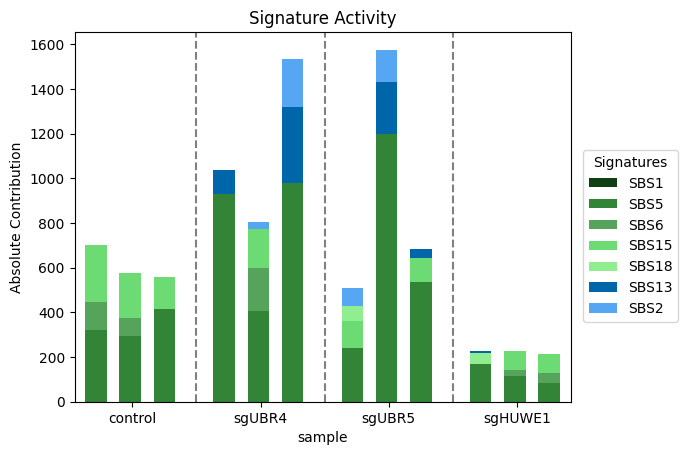

In [11]:
pu.plot_genotype_comparison_replicates(day10_raw_df, plot_title='Signature Activity',
                                       y_label= 'Absolute Contribution' )
plt.savefig('../plots/refitting_day10_raw.pdf', format='pdf')

In [12]:
control = sub1.iloc[0:3,:]
huwe = sub4.iloc[3:6,:]
ubr4 = sub2.iloc[3:6,:]
ubr5 = sub3.iloc[3:6,:]

day10_df = pd.concat([control, ubr4, ubr5, huwe], axis=0)

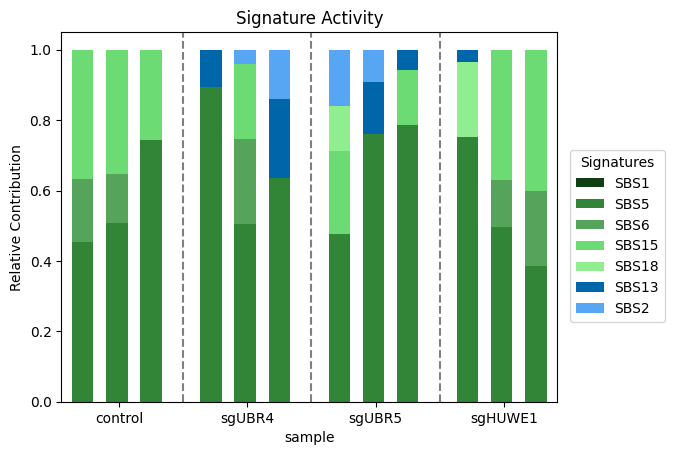

In [13]:
pu.plot_genotype_comparison_replicates(day10_df, plot_title='Signature Activity',
                                       y_label= 'Relative Contribution' )
plt.savefig('../plots/refitting_day10_scaled.pdf', format='pdf')

In [14]:
day10_df

,sample,SBS1,SBS5,SBS6,SBS15,SBS18,SBS13,SBS2
0,S110,0.0,0.454917,0.178222,0.366861,0.0,0.0,0.0
1,S123,0.0,0.507278,0.139202,0.35352,0.0,0.0,0.0
2,S68,0.0,0.743908,0.0,0.256092,0.0,0.0,0.0
3,S52,0.0,0.894591,0.0,0.0,0.0,0.105409,0.0
4,S62,0.0,0.505967,0.239427,0.213616,0.0,0.0,0.04099
5,S37,0.0,0.636758,0.0,0.0,0.0,0.223696,0.139545
3,S64,0.0,0.477696,0.0,0.234338,0.128599,0.0,0.159367
4,S56,0.0,0.761958,0.0,0.0,0.0,0.147308,0.090735
5,S41,0.0,0.784857,0.0,0.156653,0.0,0.05849,0.0
3,S77,0.0,0.753017,0.0,0.0,0.211583,0.0354,0.0


In [15]:
control_av = control.iloc[:,1:]
control_av = control_av.mean().T

huwe_av = huwe.iloc[:,1:]
huwe_av = huwe_av.mean().T

ubr4_av = ubr4.iloc[:,1:]
ubr4_av = ubr4_av.mean().T

ubr5_av = ubr5.iloc[:,1:]
ubr5_av = ubr5_av.mean().T

day10_av = pd.concat([control_av, ubr4_av, ubr5_av, huwe_av], axis = 1)

day10_av = day10_av.T

In [16]:
day10_av['sample'] = ['control', 'UBR4', 'UBR5', 'HUWE1']
day10_av

,SBS1,SBS5,SBS6,SBS15,SBS18,SBS13,SBS2,sample
0,0.0,0.568701,0.105808,0.325491,0.0,0.0,0.0,control
1,0.0,0.679105,0.079809,0.071205,0.0,0.109702,0.060178,UBR4
2,0.0,0.674837,0.0,0.130331,0.042866,0.068599,0.083367,UBR5
3,0.0,0.545152,0.115921,0.256599,0.070528,0.0118,0.0,HUWE1


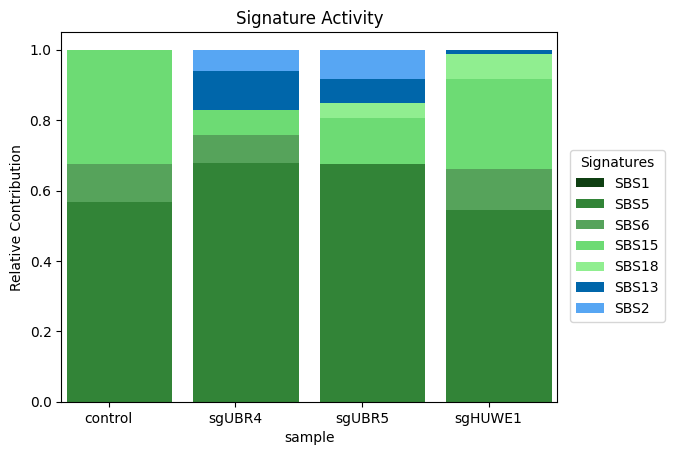

In [17]:
pu.plot_genotype_comparison_summary(day10_av, plot_title='Signature Activity')
plt.savefig('../plots/refitting_day10_summary.pdf', format='pdf')